In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
import seaborn as sns

In [ ]:
# Data Visualization 

In [5]:
velo=pd.read_csv('Séoul_Vélo_Projet_2020_2021.csv', sep=',')
velo

,Date,Nombre_de_location,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
# PARTIE 1 : Temporal Visualizations

In [6]:
# In order to be able to directly select the days, month and year separately we have made some changes

velo['Date'] = pd.to_datetime(velo['Date'])
velo['Date'] = velo['Date'].dt.strftime('%d.%m.%Y')
velo['year'] = pd.DatetimeIndex(velo['Date']).year
velo['month'] = pd.DatetimeIndex(velo['Date']).month
velo['day'] = pd.DatetimeIndex(velo['Date']).day

In [7]:
# Number of instances and attributes
# Note there are 17 instead of 14 because we added the attributes year, month and day

print(velo.shape)

(8760, 17)


In [8]:
velo.groupby('year').Nombre_de_location.sum()

# Unreliable result because the data starts only from December 2017.

year
2017     185330
2018    5986984
Name: Nombre_de_location, dtype: int64

In [9]:
# total number of bikes rented per month 

total_location_mois=velo.groupby('month').Nombre_de_location.sum()
total_location_mois

month
1     150006
2     151833
3     380594
4     524227
5     707088
6     896887
7     734460
8     651887
9     673612
10    650675
11    465715
12    185330
Name: Nombre_de_location, dtype: int64

In [ ]:
total_location_mois=velo.groupby('month').Nombre_de_location.sum()
total_location_mois

<AxesSubplot:title={'center':'Mean of location per month'}, xlabel='month'>

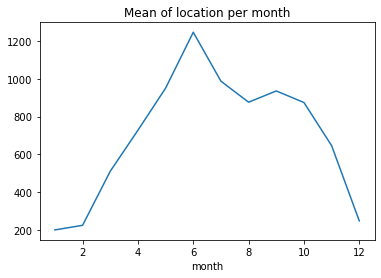

In [11]:
moyenne_location_mois.plot(title="Mean of location per month")

Text(0.5, 1.0, 'Total of location per month')

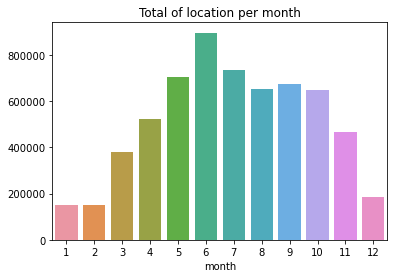

In [12]:
# We notice that the months known to have complicated weather conditions incite people not to take the bike but we'll see that later on

sns.barplot(y=total_location_mois.values, x=total_location_mois.index).set_title('Total of location per month')

In [13]:
# Regardons si cela ce vérifie avec les Saisons 
# Winter[21 Décember-20 March] Spring[21 Mars-21 June]
# Summer[22 June-21 September] Autumne[22 September-20 Décember]

total_location_saisons=velo.groupby('Seasons').Nombre_de_location.sum()
total_location_saisons

Seasons
Autumn    1790002
Spring    1611909
Summer    2283234
Winter     487169
Name: Nombre_de_location, dtype: int64

<AxesSubplot:title={'center':'Total of location per Seasons'}, xlabel='Seasons'>

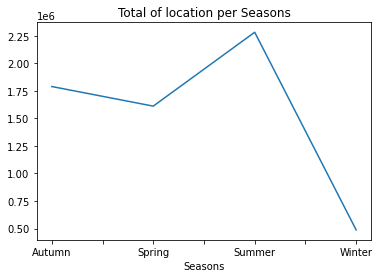

In [47]:
total_location_saisons.plot(title='Total of location per Seasons')

# The consistency of the response in the dataset is noticeable because the curve of the number of bike rentals versus seasons is similar to that of the months.
# In winter the number is really very low contrary to summer maybe due to the weather conditions...

Text(0.5, 1.0, 'Total of location per seasons')

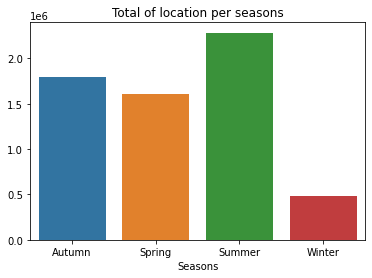

In [17]:
sns.barplot(y=total_location_saisons.values, x=total_location_saisons.index).set_title('Total of location per seasons')

In [18]:
location_heure=velo.groupby('Hour').Nombre_de_location.sum()
location_heure
# We notice that in the evening from 8pm to 5am we have a drop in the number of rentals due to the fact that people are sleeping.
# In addition, there is a rise from 5:30 to 9:00 a.m. that refers to people going to work.
# A new fall happens from 9 to 10 am because people are at work
# Finally the curve increases gradually from 10am to 8pm because it's daylight and it's convenient to ride a bike.

Hour
0     197633
1     155557
2     110095
3      74216
4      48396
5      50765
6     104961
7     221192
8     370731
9     235784
10    192655
11    219311
12    255296
13    267635
14    276971
15    302653
16    339677
17    415556
18    548568
19    436229
20    390172
21    376479
22    336821
23    244961
Name: Nombre_de_location, dtype: int64

<AxesSubplot:title={'center':'Sum of rented bike per hour'}, xlabel='Hour'>

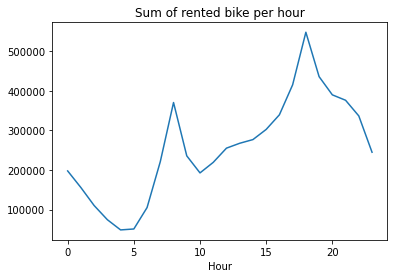

In [19]:
# Number of rentals for each hour of the day (the reasons are explained in the power point)

location_heure=velo.groupby('Hour').Nombre_de_location.sum().plot(title='Sum of rented bike per hour')
location_heure

In [20]:
# We create a pivot table to view the number of bikes rented at each hour of each month. 

pivot_table_hour_month=velo.pivot_table('Nombre_de_location', index='month', columns='Hour', aggfunc=sum)
pivot_table_hour_month

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
month,,,,,,,,,,,,,,,,,,,,,
1,4467,4278,3152,2013,1344,1506,2775,6038,12318,7443,...,7809,7968,7984,9279,11955,8258,6862,6776,6250,4607
2,4113,3932,2799,1877,1286,1250,2635,6085,11946,7085,...,7998,8705,8949,10030,13190,8895,6848,6695,6173,4557
3,9157,7550,5352,3433,2277,2283,4896,13070,23232,15175,...,21573,24266,25484,28443,36420,24660,20242,19255,17074,11444
4,14229,10391,7121,4652,2962,3254,7634,18674,32099,19832,...,27259,27984,31570,37602,49733,35529,30844,29215,25623,17997
5,19912,14814,10294,7078,4501,4919,10621,23632,37943,25328,...,34478,36938,42077,51673,65885,52105,44360,43431,38071,26625
6,29675,22989,17012,11071,7221,7734,15286,30942,48207,32596,...,37798,42133,48390,59831,74835,66363,62661,59535,53477,39471
7,27331,21465,15605,10884,7121,8104,15568,27995,43419,26844,...,24032,26755,31909,42941,64664,56570,54952,54172,48281,34989
8,25708,19833,13912,9571,6249,6788,13843,24119,38885,24372,...,20480,24006,27725,37647,56934,50878,48164,47667,42486,31699
9,22902,17772,11844,7953,5277,4952,10595,21773,34359,22950,...,31249,34223,38995,47728,60298,49307,44582,41938,37082,27634


<AxesSubplot:title={'center':'Total of location per month for each hour'}, xlabel='month'>

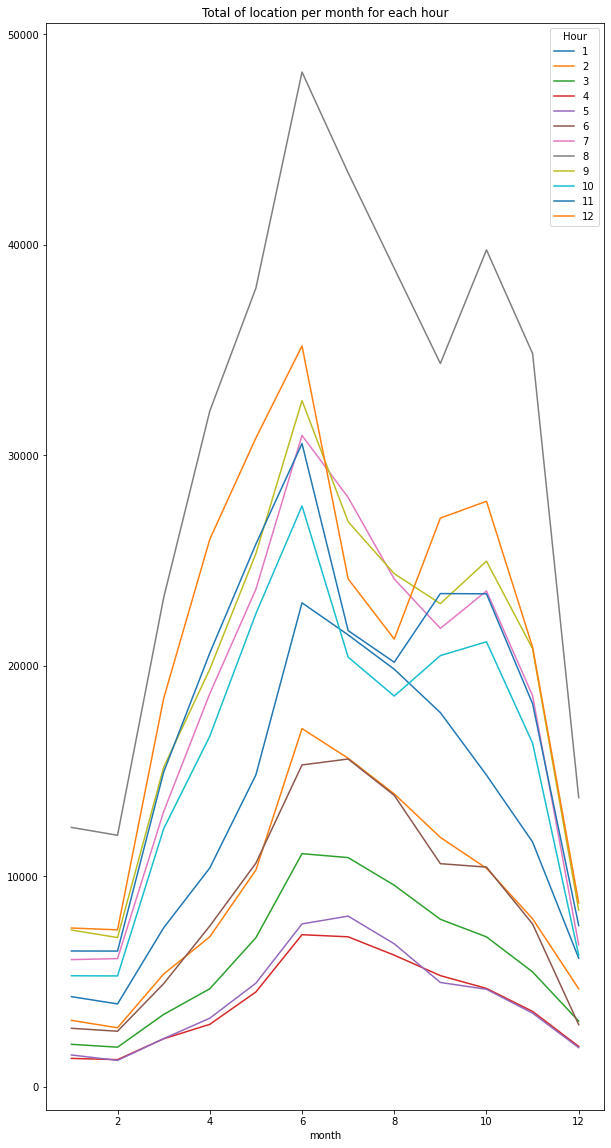

In [48]:
# And here is the graph where you can see the curves representing the hours as a function of the months and rented bikes

shéma=pivot_table_hour_month[[1,2,3,4,5,6,7,8,9,10,11,12]]
shéma.plot(figsize=(10,20), grid=False, title="Total of location per month for each hour")

<AxesSubplot:title={'center':'Total of location per month for each hour'}, xlabel='month'>

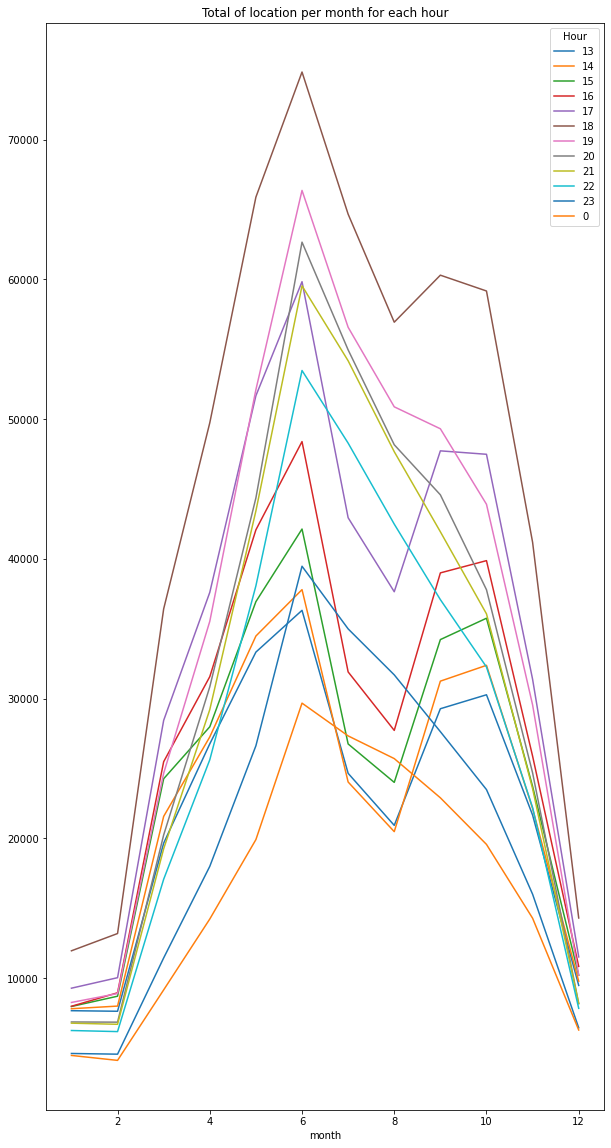

In [49]:
# the same thing here with the hours 13, 14, ..., 0

shéma=pivot_table_hour_month[[13,14,15,16,17,18,19,20,21,22,23,0]]
shéma.plot(figsize=(10,20), grid=False, title="Total of location per month for each hour")

In [23]:
location_vacance=velo.groupby('Holiday').Nombre_de_location.sum()
location_vacance

# Here the information are not representative because we have used the sum but there are far fewer days of vacation than work.
# let use the average

Holiday
Holiday        215895
No Holiday    5956419
Name: Nombre_de_location, dtype: int64

In [24]:
# The foreigners when they come to Seoul do not use bicycles but rather public transportation or cabs.
# The locals, on the other hand, have gone abroad or they don't work anymore.
# So it's normal that there are more bike rentals when you're not on vacation.

vacance_location_moyenne=velo.groupby('Holiday').Nombre_de_location.mean()
vacance_location_moyenne

Holiday
Holiday       499.756944
No Holiday    715.228026
Name: Nombre_de_location, dtype: float64

Text(0.5, 1.0, 'Average of rented bike if it is holiday or not')

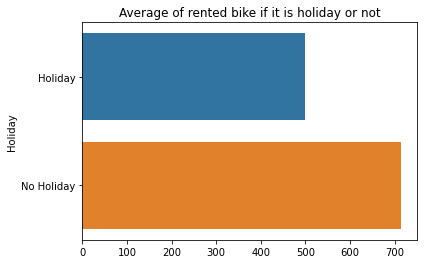

In [53]:
sns.barplot(y=vacance_location_moyenne.index, x=vacance_location_moyenne.values).set_title('Average of rented bike if it is holiday or not')

In [26]:
# Part 2: Meteorological visualizations

In [27]:
# Let's begin with de windspeed
# we started by looking at the rented bike total according to the different values of the wind speed.
# However these values are not representative. For example there will be many more days with a wind speed of 0.2 m/s than days with a wind speed of 7.3 m/s.

total_location_vent=velo.groupby('Wind_speed').Nombre_de_location.sum()
total_location_vent

Wind_speed
0.0    33154
0.1    28961
0.2    42829
0.3    71869
0.4    87556
       ...  
6.7      146
6.9       49
7.2     1805
7.3      133
7.4      913
Name: Nombre_de_location, Length: 65, dtype: int64

In [45]:
# So we chose to use the average of the number of bikes rented for each wind speed value.
# But even with that there are some indexes that have only one value. So the average will be equal to this value and will not be representative.
# For example, in one year, it happened only once that the wind speed reached 7.2m/s. But the number of bikes rented during this hour was 1805. Which is a lot when you look at the graph below.

mean_location_vent=velo.groupby('Wind_speed').Nombre_de_location.mean()
mean_location_vent

Wind_speed
0.0     448.027027
0.1     591.040816
0.2     498.011628
0.3     454.867089
0.4     470.731183
          ...     
6.7     146.000000
6.9      49.000000
7.2    1805.000000
7.3     133.000000
7.4     913.000000
Name: Nombre_de_location, Length: 65, dtype: float64

<AxesSubplot:title={'center':'Average of rented bike by Windspeed'}, xlabel='Wind_speed'>

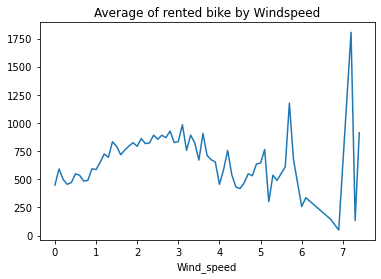

In [54]:
# We can see a huge pic at wind_speed=7.2 because there is only one value.

mean_location_vent.plot(title='Average of rented bike by Windspeed')

<AxesSubplot:title={'center':'Average of rented bike per humidity'}, xlabel='Humidity'>

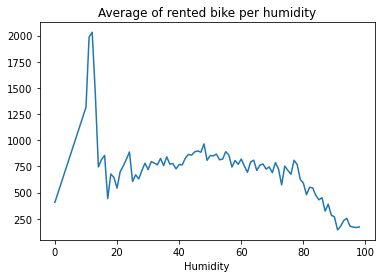

In [58]:
# There is a very high demand for bicycle rentals when humidity is low (between 0 and 15%). 
# This is consistent because when humidity is high, our body sweats and doesn't want to exercise.
# So biking is not appropriate. 

Humidity_locatiozn=velo.groupby('Humidity').Nombre_de_location.mean().plot(title='Average of rented bike per humidity')
Humidity_locatiozn

<AxesSubplot:xlabel='Temperature'>

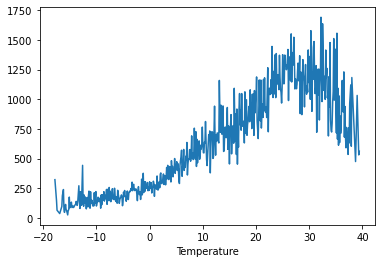

In [59]:
# There is a very low demand for bike rentals when the temperature is low (between -20 and 10 degrees).
# This is consistent because when the temperature is low, people don't want to stay outside for long, let alone ride a bike.

Temperature_location=velo.groupby('Temperature').Nombre_de_location.mean().plot()
Temperature_location

Text(0.5, 1.0, 'Average of number of bike rented if there is radiation or not')

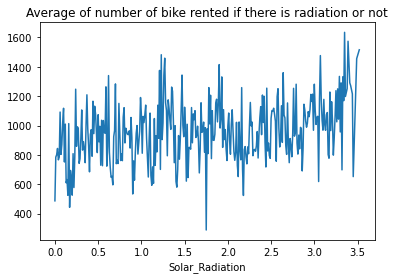

In [90]:
# We have presented here a graph that shows us that solar radiation does not really have an impact on bike rental.
# Indeed people don't really pay attention to that.
# That's why we have equal values in terms of bike rentals for different solar radiation indices.

moyenne_location_radiation=velo.groupby('Solar_Radiation').Nombre_de_location.mean().plot().set_title('Average of number of bike rented if there is radiation or not')
moyenne_location_radiation

In [84]:
# We didn't want to directly change the velo dataframe so we created a new one.
# Creation of a dataframe in order to create a new column that returns "non" if there is 0 cm of snow on the ground or "yes" if there is.

data_fram=pd.DataFrame()
data_fram['Nombre_de_location']=velo.Nombre_de_location
data_fram['Snowfall']=velo.Snowfall
data_fram

data_fram['Snow_index']=data_fram['Snowfall'].map(lambda x: 'non' if x==0 else 'oui')
data_fram

,Nombre_de_location,Snowfall,Snow_index
0,254,0.0,non
1,204,0.0,non
2,173,0.0,non
3,107,0.0,non
4,78,0.0,non
...,...,...,...
8755,1003,0.0,non
8756,764,0.0,non
8757,694,0.0,non
8758,712,0.0,non


In [32]:
data_fram.dtypes

Nombre_de_location      int64
Snowfall              float64
Snow_index             object
dtype: object

In [85]:
# This command represents the average of rented bikes there is each hour depending on whether the snow is present ("oui") or not ("non").
# it summarizes the 5 code boxes up

Moyenne_location_Snow=data_fram.groupby('Snow_index').Nombre_de_location.mean()
Moyenne_location_Snow

Snow_index
non    732.272935
oui    185.101580
Name: Nombre_de_location, dtype: float64

Text(0.5, 1.0, 'Average of rented bike by hour if there is snow or not')

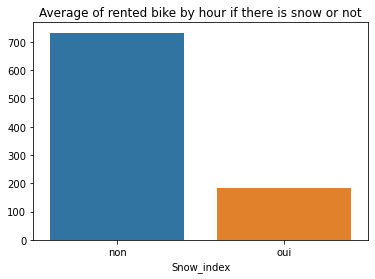

In [86]:
# It is observed that when snow is present on the ground whether it is 0.1cm or 2m, people will ride bicycles less because the ground can be very slippery and can cause accidents on the road.

sns.barplot(y=Moyenne_location_Snow.values, x=Moyenne_location_Snow.index).set_title('Average of rented bike by hour if there is snow or not')

In [87]:
# We add here the columns 'Rainfall_index' and 'Solar_radiation_index' to this dataframe in order to know if it rains 'oui' or 'non' and if the radiation is present 'oui' or 'non'.

data_fram['Rainfall']=velo.Rainfall

data_fram['Rainfall_index']=data_fram['Rainfall'].map(lambda x: "oui" if x!=0 else 'non')


data_fram

,Nombre_de_location,Snowfall,Snow_index,Rainfall,Rainfall_index
0,254,0.0,non,0.0,non
1,204,0.0,non,0.0,non
2,173,0.0,non,0.0,non
3,107,0.0,non,0.0,non
4,78,0.0,non,0.0,non
...,...,...,...,...,...
8755,1003,0.0,non,0.0,non
8756,764,0.0,non,0.0,non
8757,694,0.0,non,0.0,non
8758,712,0.0,non,0.0,non


In [88]:
# Variable that shows the average number of bikes rented based on whether it rains or not.

Moyenne_location_Rainfall=data_fram.groupby('Rainfall_index').Nombre_de_location.mean()
Moyenne_location_Rainfall

Rainfall_index
non    739.311103
oui    163.456439
Name: Nombre_de_location, dtype: float64

Text(0.5, 1.0, 'Average of number of bike rented if it is raining or not')

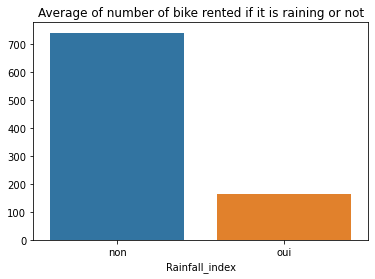

In [89]:
sns.barplot(y=Moyenne_location_Rainfall.values, x=Moyenne_location_Rainfall.index).set_title('Average of number of bike rented if it is raining or not')